Notebook for evaluating different similarity measurements as candidates for automatic keyframe detection
See: https://github.com/up42/image-similarity-measures

In [1]:
import image_similarity_measures
from image_similarity_measures.quality_metrics import metric_functions
import cv2
import pandas as pd
import numpy as np
from typing import List
import time
import seaborn as sns

Image choices: img_path_X = "0001.jpg" --> img_0 img_path_Y = "0108.jpg" --> img_1 img_path_Z = "0115.jpg" --> img_2

compare img_0 with itself for sanity check - if the metrics work correctly, there should be no difference

compare img_0 and img_1: Difference between img_0 and img_1 is substantial - both could be two different keyframes

compare img_1 and img_2: These two are very similar to each other, compare to test sensitivity of metrics

In [2]:
all_metrics =  ['psnr', 'rmse',  'sre', 'ssim']
comparison_images = [ "img/0001.jpg", "img/0108.jpg", "img/0115.jpg", "img/0150.jpg"]

In [3]:
def compare(df: pd.DataFrame, path_a: str, path_b: str, metrics: List[str]) -> pd.DataFrame:
    img_a = cv2.imread(path_a)
    img_b = cv2.imread(path_b)

    for metric in metrics:
        metric_func = metric_functions[metric]
        start_time = time.time()
        out_value = float(metric_func(img_a, img_b))
        end_time = time.time()
        output_dict = {}
        output_dict['metric'] = metric
        output_dict['x'] = path_a
        output_dict['y'] = path_b
        output_dict['value'] = out_value
        output_dict['walltime'] = end_time - start_time
        df = df.append(output_dict,ignore_index=True)
        output_dict['x'] = path_b
        output_dict['y'] = path_a
        df = df.append(output_dict,ignore_index=True)
        
    return df

In [4]:
df = pd.DataFrame()
for idx_x, x in enumerate(comparison_images):
    for idx_y, y in enumerate(comparison_images):
        # remove duplicate comparisons: (x,y) == (y,x) or (x,x)
        if idx_x >= idx_y:
            continue
        df = compare(df, x, y, all_metrics)
df

,metric,x,y,value,walltime
0,psnr,img/0001.jpg,img/0108.jpg,38.763969,0.042572
1,psnr,img/0108.jpg,img/0001.jpg,38.763969,0.042572
2,rmse,img/0001.jpg,img/0108.jpg,0.011529,0.097714
3,rmse,img/0108.jpg,img/0001.jpg,0.011529,0.097714
4,sre,img/0001.jpg,img/0108.jpg,57.253421,0.027287
5,sre,img/0108.jpg,img/0001.jpg,57.253421,0.027287
6,ssim,img/0001.jpg,img/0108.jpg,0.914471,0.819292
7,ssim,img/0108.jpg,img/0001.jpg,0.914471,0.819292
8,psnr,img/0001.jpg,img/0115.jpg,38.895812,0.030205
9,psnr,img/0115.jpg,img/0001.jpg,38.895812,0.030205


In [5]:
#Build some nice plots for better evaluation
#select one metric and pivot the dataframe for creating the heatmap plot
plot_df = df[df.metric == 'rmse'].pivot('x', 'y', 'value')

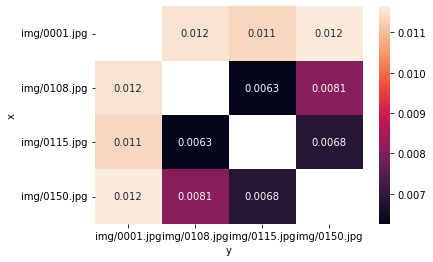

In [6]:
ax = sns.heatmap(plot_df, annot=True)

/var/folders/q0/71ws9rkn6n71wnc8ztzpc8l40000gn/T/ipykernel_21726/3660621754.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[args[2]] -= min_val
/var/folders/q0/71ws9rkn6n71wnc8ztzpc8l40000gn/T/ipykernel_21726/3660621754.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[args[2]] /= (max_val - min_val)


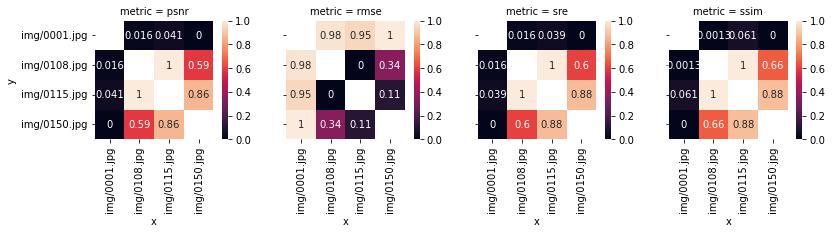

In [7]:
#Build multi-grid plot with all metrics
#https://seaborn.pydata.org/tutorial/axis_grids.html
#https://stackoverflow.com/a/43157303/14449609

def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    #access all values ...
    values = data[args[2]].to_numpy()
    #...and normalize them
    min_val = np.min(values)
    max_val = np.max(values)
    data[args[2]] -= min_val
    data[args[2]] /= (max_val - min_val)
    
    
    #print(min_val, max_val)
    d = data.pivot(index=args[0], columns=args[1], values=args[2])
    sns.heatmap(d, **kwargs)

fg = sns.FacetGrid(df, col='metric')
fg.map_dataframe(draw_heatmap, 'x', 'y', 'value', square = True, annot=True)